In [1]:
import os


import numpy as np

from dynamic_programming.policy_iteration import PolicyIteration
from dynamic_programming.mdp_model import MDPModel
from dynamic_programming.policy import DPPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from envs.plot import plot_industrial_benchmark_trajectories
import pandas as pd
from matplotlib import pyplot as plt

## Load Data and MDP Model

In [2]:
trajectories_samples = ['trajectory_ep10_model_aeq.npy', 'trajectory_ep10_model_final_h.npy',
                        'trajectory_ep10_model_h_c.npy', 'trajectory_ep100_model_aeq.npy',
                        'trajectory_ep100_model_final_h.npy', 'trajectory_ep100_model_h_c.npy',
                        'trajectory_ep1000_model_aeq.npy', 'trajectory_ep1000_model_h_c.npy',
                        'trajectory_ep1000_model_final_h.npy']

device = 'cpu'
mdp_save_paths = [f'tmp/dynamic_programming/mdp_{file.split(".")[0]}.pkl' for file in trajectories_samples]
model_names = [''.join(file.split(".")[0].split('ep')[-1].split('_', maxsplit=1)[-1]) for file in trajectories_samples]
quant_models_paths = [f'tmp/state_quantization/{model_name}' for model_name in model_names]
policies_save_paths = [f'tmp/dynamic_programming/policy_{file.split(".")[0]}.pkl' for file in trajectories_samples]

In [3]:
from dynamic_programming.mdp_model import create_mdp_models

for i, sample_file in enumerate(trajectories_samples):
    load_path = os.path.join("tmp", "offline_rl_trajectories", sample_file)
    create_mdp_models(load_path=load_path, mdp_save_path=mdp_save_paths[i], reward_function_type='state', device=device)

Computing Reward Function
Computing Transition Model
tmp/dynamic_programming/mdp_trajectory_ep10_model_aeq.pkl
-488.79206098716736
100000
0.0
1219
Computing Reward Function
Computing Transition Model
tmp/dynamic_programming/mdp_trajectory_ep10_model_final_h.pkl
-418.9604818501282
100000
0.0
1053
Computing Reward Function
Computing Transition Model
tmp/dynamic_programming/mdp_trajectory_ep10_model_h_c.pkl
-491.83630801460265
100000
0.0
1087
Computing Reward Function
Computing Transition Model
tmp/dynamic_programming/mdp_trajectory_ep100_model_aeq.pkl
-465.04649392097474
1100000
0.0
1705
Computing Reward Function
Computing Transition Model
tmp/dynamic_programming/mdp_trajectory_ep100_model_final_h.pkl
-459.6530046223068
1100000
0.0
1582
Computing Reward Function
Computing Transition Model
tmp/dynamic_programming/mdp_trajectory_ep100_model_h_c.pkl
-469.59514335449217
1100000
0.0
1589
Computing Reward Function
Computing Transition Model
tmp/dynamic_programming/mdp_trajectory_ep1000_model_a

## Train

2047.8834703570737
2003.5156323240717
1965.3123855346485
1938.934487429885
1897.4442145548182
1846.5865845629905
1790.019889025487
1730.2247399809057
1668.9496300689643
1607.446908693939
1546.6119024854452
1487.0745270749103
1429.2649734420556
1373.4632015727402
1319.8370319118076
1277.6103067735385
1264.8342037058028
1252.1858616687423
1239.6640030520575
1227.2673630215359
1214.9946893913184
1202.8447424974074
1190.8162950724327
1178.908132121709
1167.1190508004947
1155.4478602924864
1143.8933816895587
1132.4544478726675
1121.1299033939358
1109.9186043599984
1098.8194183164014
1087.8312241332387
1076.9529118919017
1066.183382772986
1055.521548945253
1044.966333455799
1034.5166701212438
1024.1715034200315
1013.9297883858308
1003.790490501975
993.7525855969507
983.815059740984
973.9769091435737
964.237140052137
954.5947686516156
945.0488209651012
935.5983327554495
926.2423494278919
916.9799259336141
907.8101266742815
898.7320254075385
889.7447051534618
880.8472581019305
872.038785520904

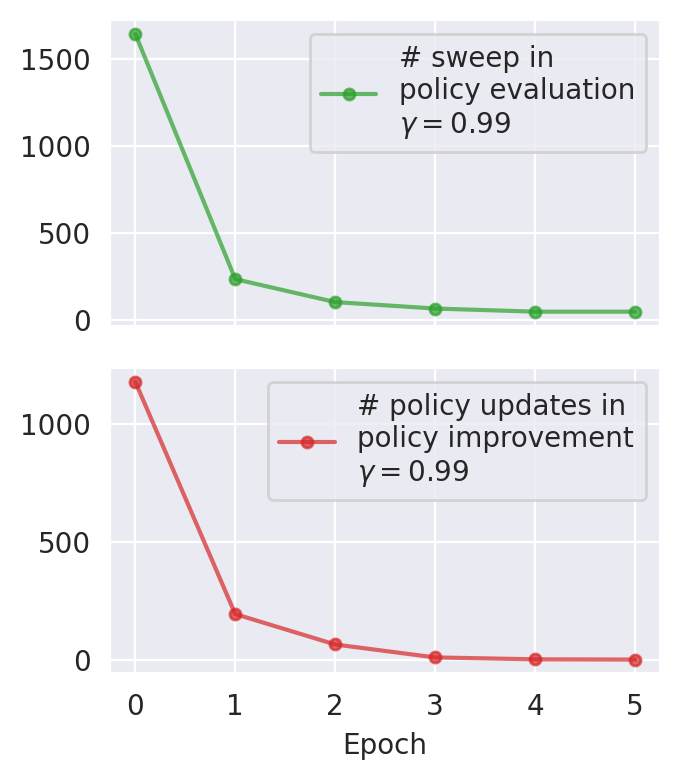

2332.3844411351506
2157.9176021590606
2063.3880431242196
1977.8052659244813
1888.9083798906013
1798.8472103245404
1712.55994015107
1695.4343407495599
1678.4799973420613
1661.6951973686446
1645.0782453949578
1628.6274629410073
1612.341188311595
1596.2177764284825
1580.2555986641964
1564.4530426775527
1548.80851225078
1533.3204271282702
1517.9872228569839
1502.80735062842
1487.7792771221357
1472.901484350914
1458.1724695074008
1443.5907448123326
1429.1548373642072
1414.863288990564
1400.7146561006593
1386.7075095396503
1372.8404344442533
1359.1120300998155
1345.5209097988118
1332.0657007008267
1318.7450436938161
1305.5575932568827
1292.5020173243101
1279.5769971510672
1266.7812271795556
1254.1134149077625
1241.5722807586862
1229.1565579511007
1216.8649923715857
1204.6963424478672
1192.6493790233944
1180.722885233161
1168.915656380821
1157.226499817014
1145.6542348188523
1134.1976924706541
1122.8557155459566
1111.627158390489
1100.5108868065872
1089.5057779385243
1078.6107201591367
1067.8

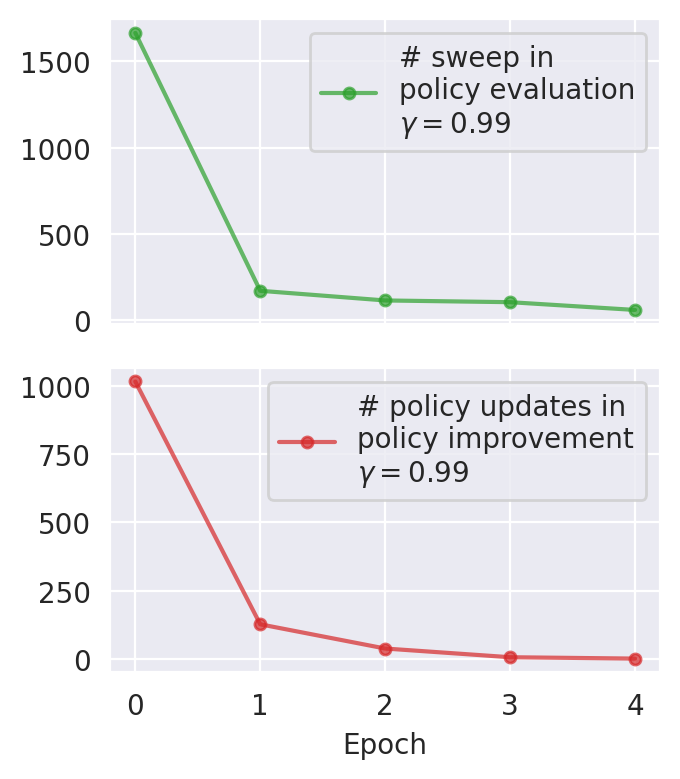

2309.443017867121
1886.2739643655023
1867.4112247218482
1828.8332055836572
1756.2186653590234
1678.2796967013692
1650.17475205944
1608.6159054937416
1542.2787198588303
1457.9974775713436
1362.326413461149
1338.3252727223116
1324.9420199950873
1311.6925997951366
1298.575673797186
1285.589917059213
1272.7340178886225
1260.0066777097345
1247.4066109326377
1234.9325448233103
1222.5832193750794
1210.3573871813278
1198.253813309515
1186.2712751764157
1174.4085624246582
1162.6644768004116
1151.0378320324016
1139.5274537120786
1128.1321791749579
1116.8508573832078
1105.6823488093796
1094.6255253212876
1083.6792700680744
1072.8424773673905
1062.1140525937153
1051.492912067777
1040.9779829471008
1030.568203117633
1020.2625210864571
1010.0598958755872
999.959296916837
989.9597039476648
980.0601069081895
970.2595058391089
960.5569107807169
950.9513416729096
941.4418282561819
932.0274099736198
922.7071358738831
913.4800645151408
904.3452638699891
895.301811231293
886.3487931189811
877.4853051877872

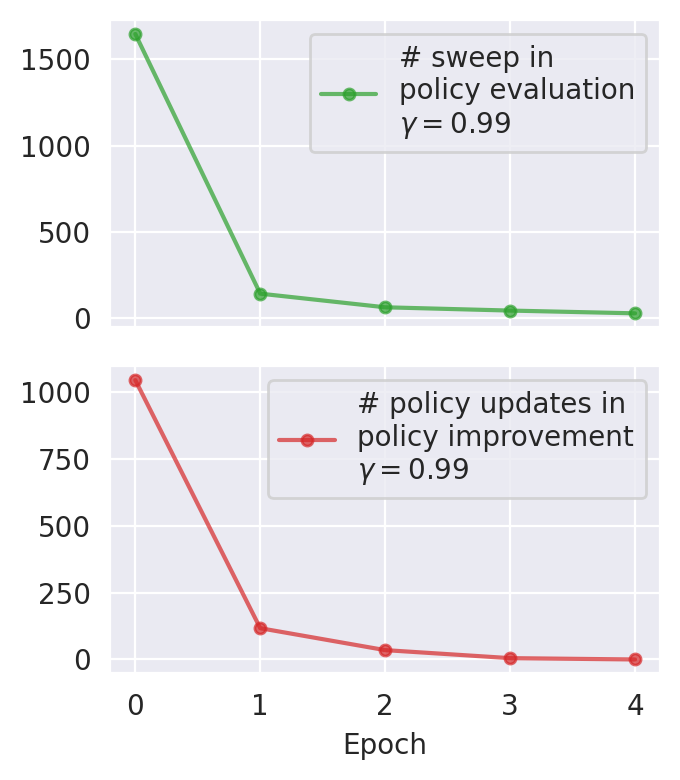

2117.635731479175
2095.186859862957
2034.1700974166442
1968.3858835197743
1921.4183756376042
1866.7146319620188
1808.1319410078904
1748.5660408194344
1689.5029720062594
1631.7026363236473
1575.5471020751756
1521.219016177769
1468.7938434840034
1418.2882107166915
1369.685714806532
1322.9510252695982
1278.0378084710064
1234.8933245575863
1193.4640121969605
1181.5293720749905
1169.7140783542382
1158.0169375706973
1146.4367681949916
1134.972400513041
1123.6226765079045
1112.3864497428294
1101.2625852454003
1090.249959392946
1079.3474597990207
1068.553985201026
1057.8684453490205
1047.2897608955318
1036.8168632865709
1026.4486946537072
1016.1842077071706
1006.022365630095
995.962141973796
986.0025205540587
976.1424953485184
966.3810703950367
956.7172596910823
947.1500870941745
937.6785862232282
928.3018003609977
919.018782357387
909.8285945338139
900.7303085884778
891.7230055025939
882.8057754475667
873.9777176930875
865.2379405161555
856.5855611109946
848.0197054998862
839.5395084448901
83

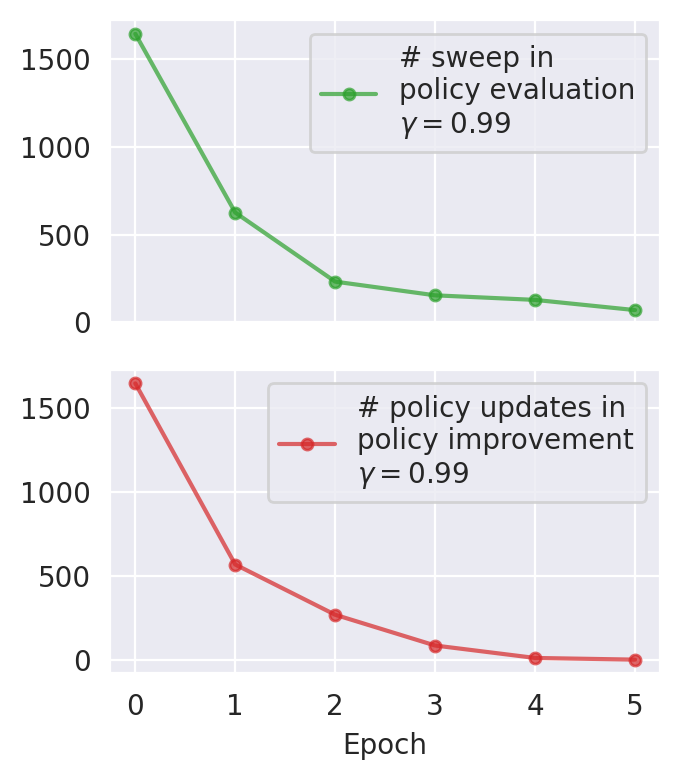

2772.318528137246
2184.380417507893
2010.9573105105464
1930.3733716054558
1869.847842795447
1823.1255639923384
1781.565791507488
1729.458924598599
1669.0617095518846
1604.3027667285678
1537.9838568997366
1472.02994332444
1407.7157777964894
1345.8458028139758
1286.8896949632945
1231.082304965279
1178.4966447079714
1129.096856312659
1082.7763834364378
1039.3852192176746
998.7491134374577
960.6828928622999
924.9995051976439
891.515985910024
860.0572345053515
830.4582498683012
802.5652962182066
776.2363389470338
751.3409924138978
727.7601510855457
707.0792421753322
688.2607452585798
670.2914781220534
653.0695999265881
636.3056187657239
619.993192527043
604.1246592690732
588.6913566730218
573.6838824276274
559.0923060257555
544.9063405932902
531.1154818381765
517.7091199493298
504.6766292424072
492.0074395025222
479.69109228029265
467.71728482767503
456.0759038926408
444.7570512065795
440.11617597458826
435.7150142148421
431.3578640726955
427.0442854319663
422.7738425776479
418.546104151872

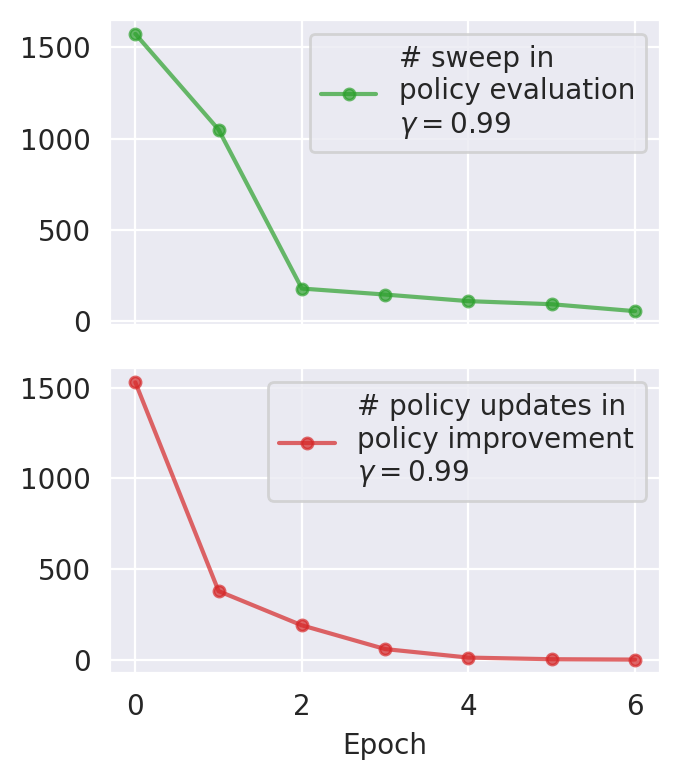

2590.6918961884435
2039.7934076160727
1975.2850019977159
1921.9797917661508
1877.2372971848145
1839.0489669180588
1805.8868452070055
1776.588480875549
1750.269398808614
1726.2565331170008
1704.03760198913
1683.222606442494
1663.514549488591
1644.6871675651928
1626.5679949066507
1609.0254836964996
1591.9592087054152
1575.2924177284513
1558.9663660392398
1542.9360076169978
1527.1667182206656
1511.6318031990595
1496.31060210531
1481.1870471904185
1466.2485670795359
1451.4852529650016
1436.8892244482631
1422.4541472176425
1408.1748662006285
1394.047126536003
1380.067361335161
1366.2325302377358
1352.539996597443
1338.9874340471943
1325.5727554079058
1312.2940585902688
1299.1495854204477
1286.1376902947231
1273.2568163097021
1260.5054770779752
1247.8822428680505
1235.3857300332747
1223.014592942287
1210.7675178123318
1198.6432179900294
1186.640430333122
1174.7579124299664
1162.9944404563284
1151.348807517279
1139.819822358113
1128.406308356367
1117.1071027277503
1105.9210558951163
1094.8470

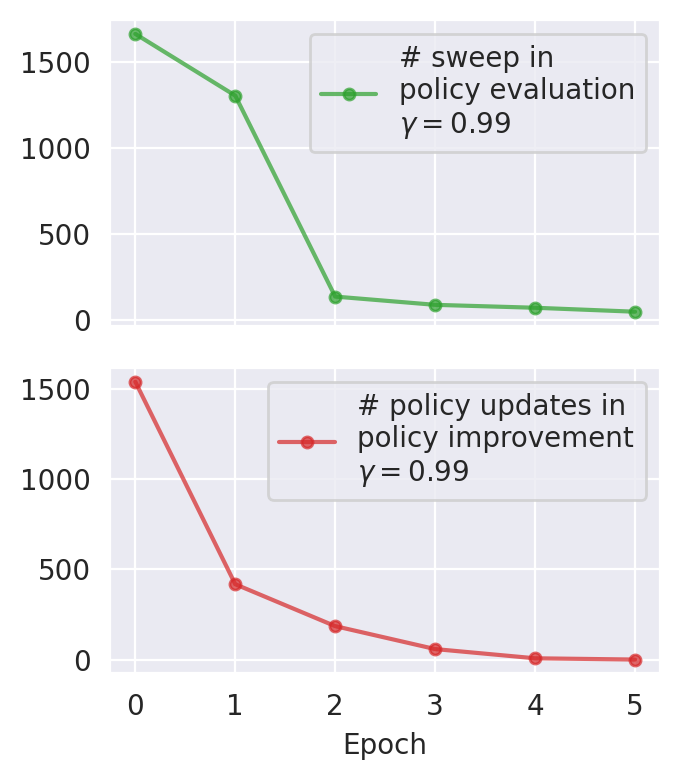

2143.7689682795863
2112.747101553136
2091.6196305376043
2037.1464434978798
1969.7776740394802
1901.4849667955768
1835.0422219322172
1771.0327678905287
1709.5158799387318
1650.4252882338333
1593.6660058707967
1539.1387883971438
1486.7467717009167
1436.3974075329133
1388.0029718491824
1341.4805497204834
1296.7518003557452
1253.7426321467792
1212.382853357194
1172.6058330404267
1134.3481892696655
1097.549511482226
1062.152117860387
1028.1008455439587
995.3428700328586
963.8275496968345
933.506291413396
904.3324337329832
876.2611444521608
849.2493299720372
823.2555542805057
798.2399658018694
774.1642307010552
750.991471512636
728.6862101962251
707.2143149030308
686.542949886767
666.6405281067055
647.4766661629837
629.0221412757164
611.2488500765612
594.1297690252541
577.6389163000131
561.7513150379455
546.4429578245908
531.6907723494514
517.4725881587292
503.76710444853234
490.553858850697
477.81319717137376
465.52624404828384
453.67487449788314
447.9656758314013
443.48601907308694
439.051

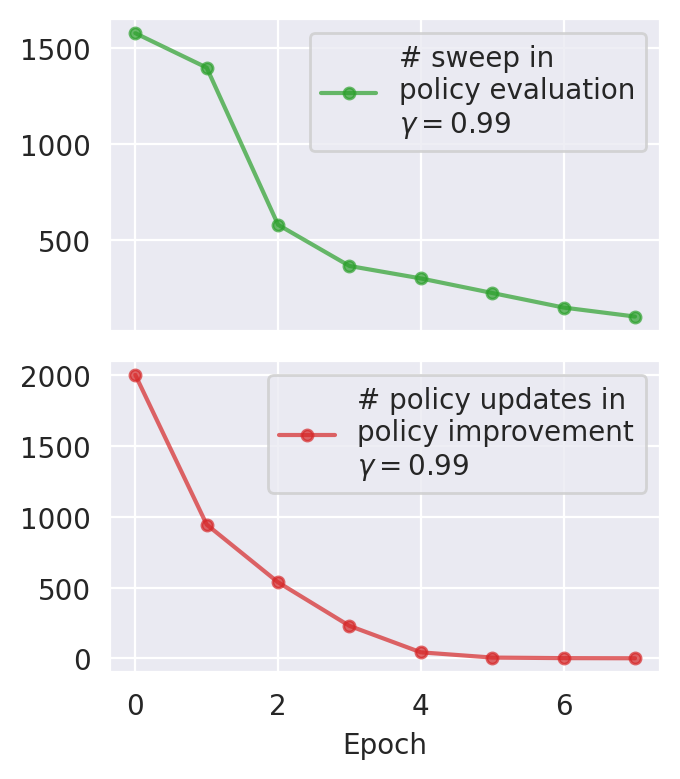

2643.2007473751946
2289.4378789628745
1998.6330717415394
1912.4362171299126
1863.4909916153028
1820.3802102176232
1781.850418490214
1746.9333021993025
1714.8808252101117
1685.1150866941134
1657.1894556533916
1630.7584762557308
1605.5546050139747
1581.3702579402707
1558.0439745757503
1535.4497676601895
1513.4889341325143
1492.0837652616538
1471.172720091483
1450.7067247425875
1430.6463366329044
1410.9595721862788
1391.6202428286706
1372.6066799279288
1353.9007570805115
1335.4871395661175
1317.3527072819998
1299.486110134385
1281.8774245717868
1264.5178873714904
1247.3996884642838
1230.515808911594
1213.859893451372
1197.426149545361
1181.209266778038
1165.204351919696
1149.406876078836
1133.812631218876
1118.4176939600075
1103.2183950807303
1088.2112935088007
1073.3931538773104
1058.7609269393724
1044.311732300761
1030.04284305498
1015.9516720019164
1002.0357592023065
988.2927606765588
974.720438096716
961.3166493530007
948.0793398988753
935.0065347976924
922.0963314065011
909.346892643

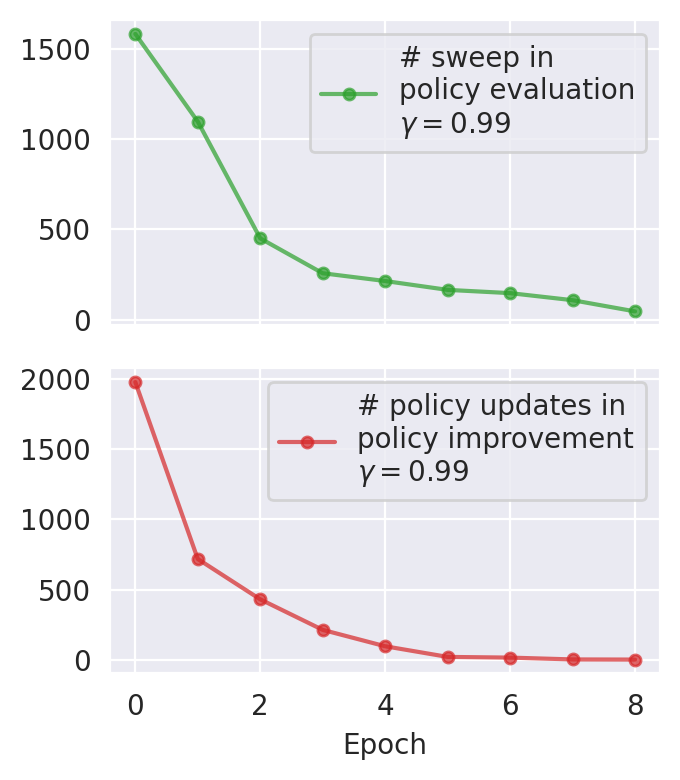

3428.8784150952615
2080.2507621691884
1953.843275699498
1885.9298142991938
1825.986323146195
1799.8611962462764
1766.7572654433043
1725.241932568675
1678.3404940551482
1628.176962608828
1576.228143530294
1523.5381098081925
1470.8601898799534
1418.7450121361362
1367.5955030127116
1317.7029956521983
1269.2725996762456
1222.4421656751874
1177.2970751105422
1133.8820283629502
1092.210505215855
1052.2723448151883
1014.0397843110477
977.4722350356242
949.8972443648527
940.3982719212036
930.9942892019935
921.6843463099722
912.4675028468737
903.3428278184037
894.3093995402196
885.3663055448196
876.5126424893679
867.7475160644753
859.0700409038327
850.4793404947923
841.9745470898488
833.5548016189496
825.2192536027578
816.9670610667308
808.797390456064
800.7094165515009
792.7023223859869
784.7752991621237
776.9275461705038
769.1582707088019
761.4666880017103
753.8520211216965
746.3135009104808
738.8503659013732
731.4618622423586
724.1472436199401
716.9057711837377
709.7367134719025
702.63934633

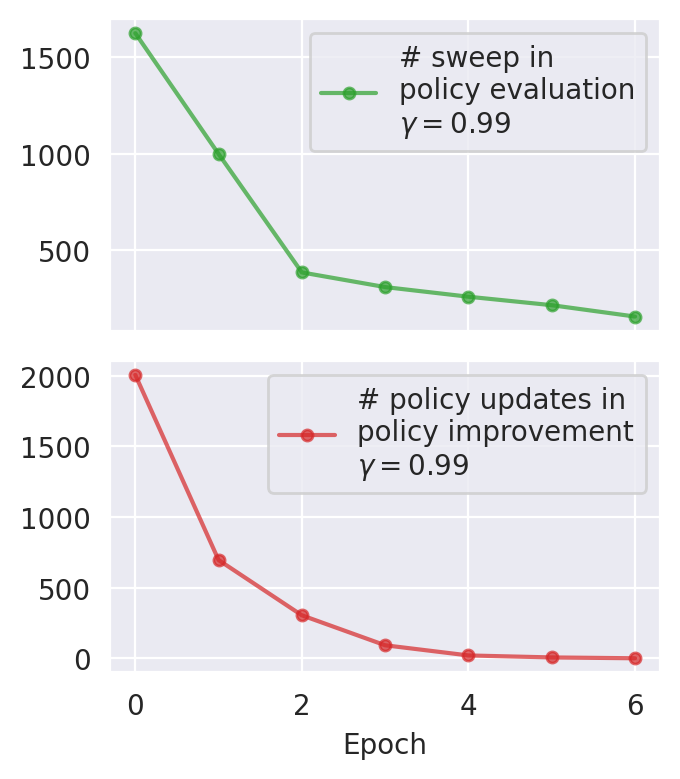

In [7]:
def train_policy_iteration(mdp_path, policy_save_path):
    mdp_model = MDPModel.load(mdp_path)
    solver = PolicyIteration(reward_function=mdp_model.reward_function, transition_model=mdp_model.transition_model,
                         gamma=0.99, sa_reward=sa_reward)
    solver.train(total_epochs=1000,eval_epochs=2000)
    trained_policy = DPPolicy(policy_table=solver.policy, state_to_index=mdp_model.state_to_index,
                              index_to_action=mdp_model.index_to_actions)
    trained_policy.save(policy_save_path)


for i, mdp_save_path in enumerate(mdp_save_paths):
    train_policy_iteration(mdp_path=mdp_save_path, policy_save_path=policies_save_paths[i])

Episode 9 Reward: -384.68030819148686 || New State Found: False


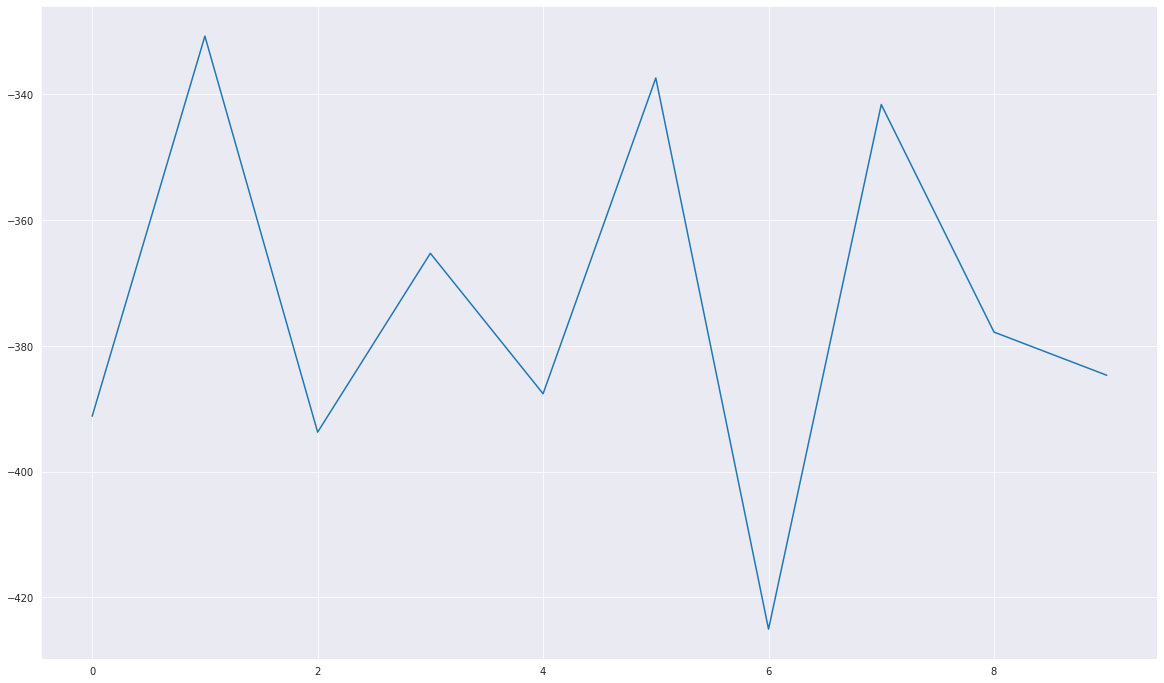

Reward Mean: -373.5150947032903
Reward std : 28.183450561338123


In [8]:
from benchmarks.policy_benchmarks import PolicyBenchmarks

steps_per_episode = 1000
evaluators = []
for i, policy_file in enumerate(policies_save_paths):
    print(policy_file)
    eval_policy = DPPolicy.load(policy_file)
    env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device, 'model_path': quant_models_paths[i]}
    evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs,
                                        tag=policy_file.split('/')[-1].split('.')[0])
    evaluators.append(evaluator)

policy_benchmarks = PolicyBenchmarks(evaluators=evaluators, epochs=10)
policy_benchmarks.benchmark()

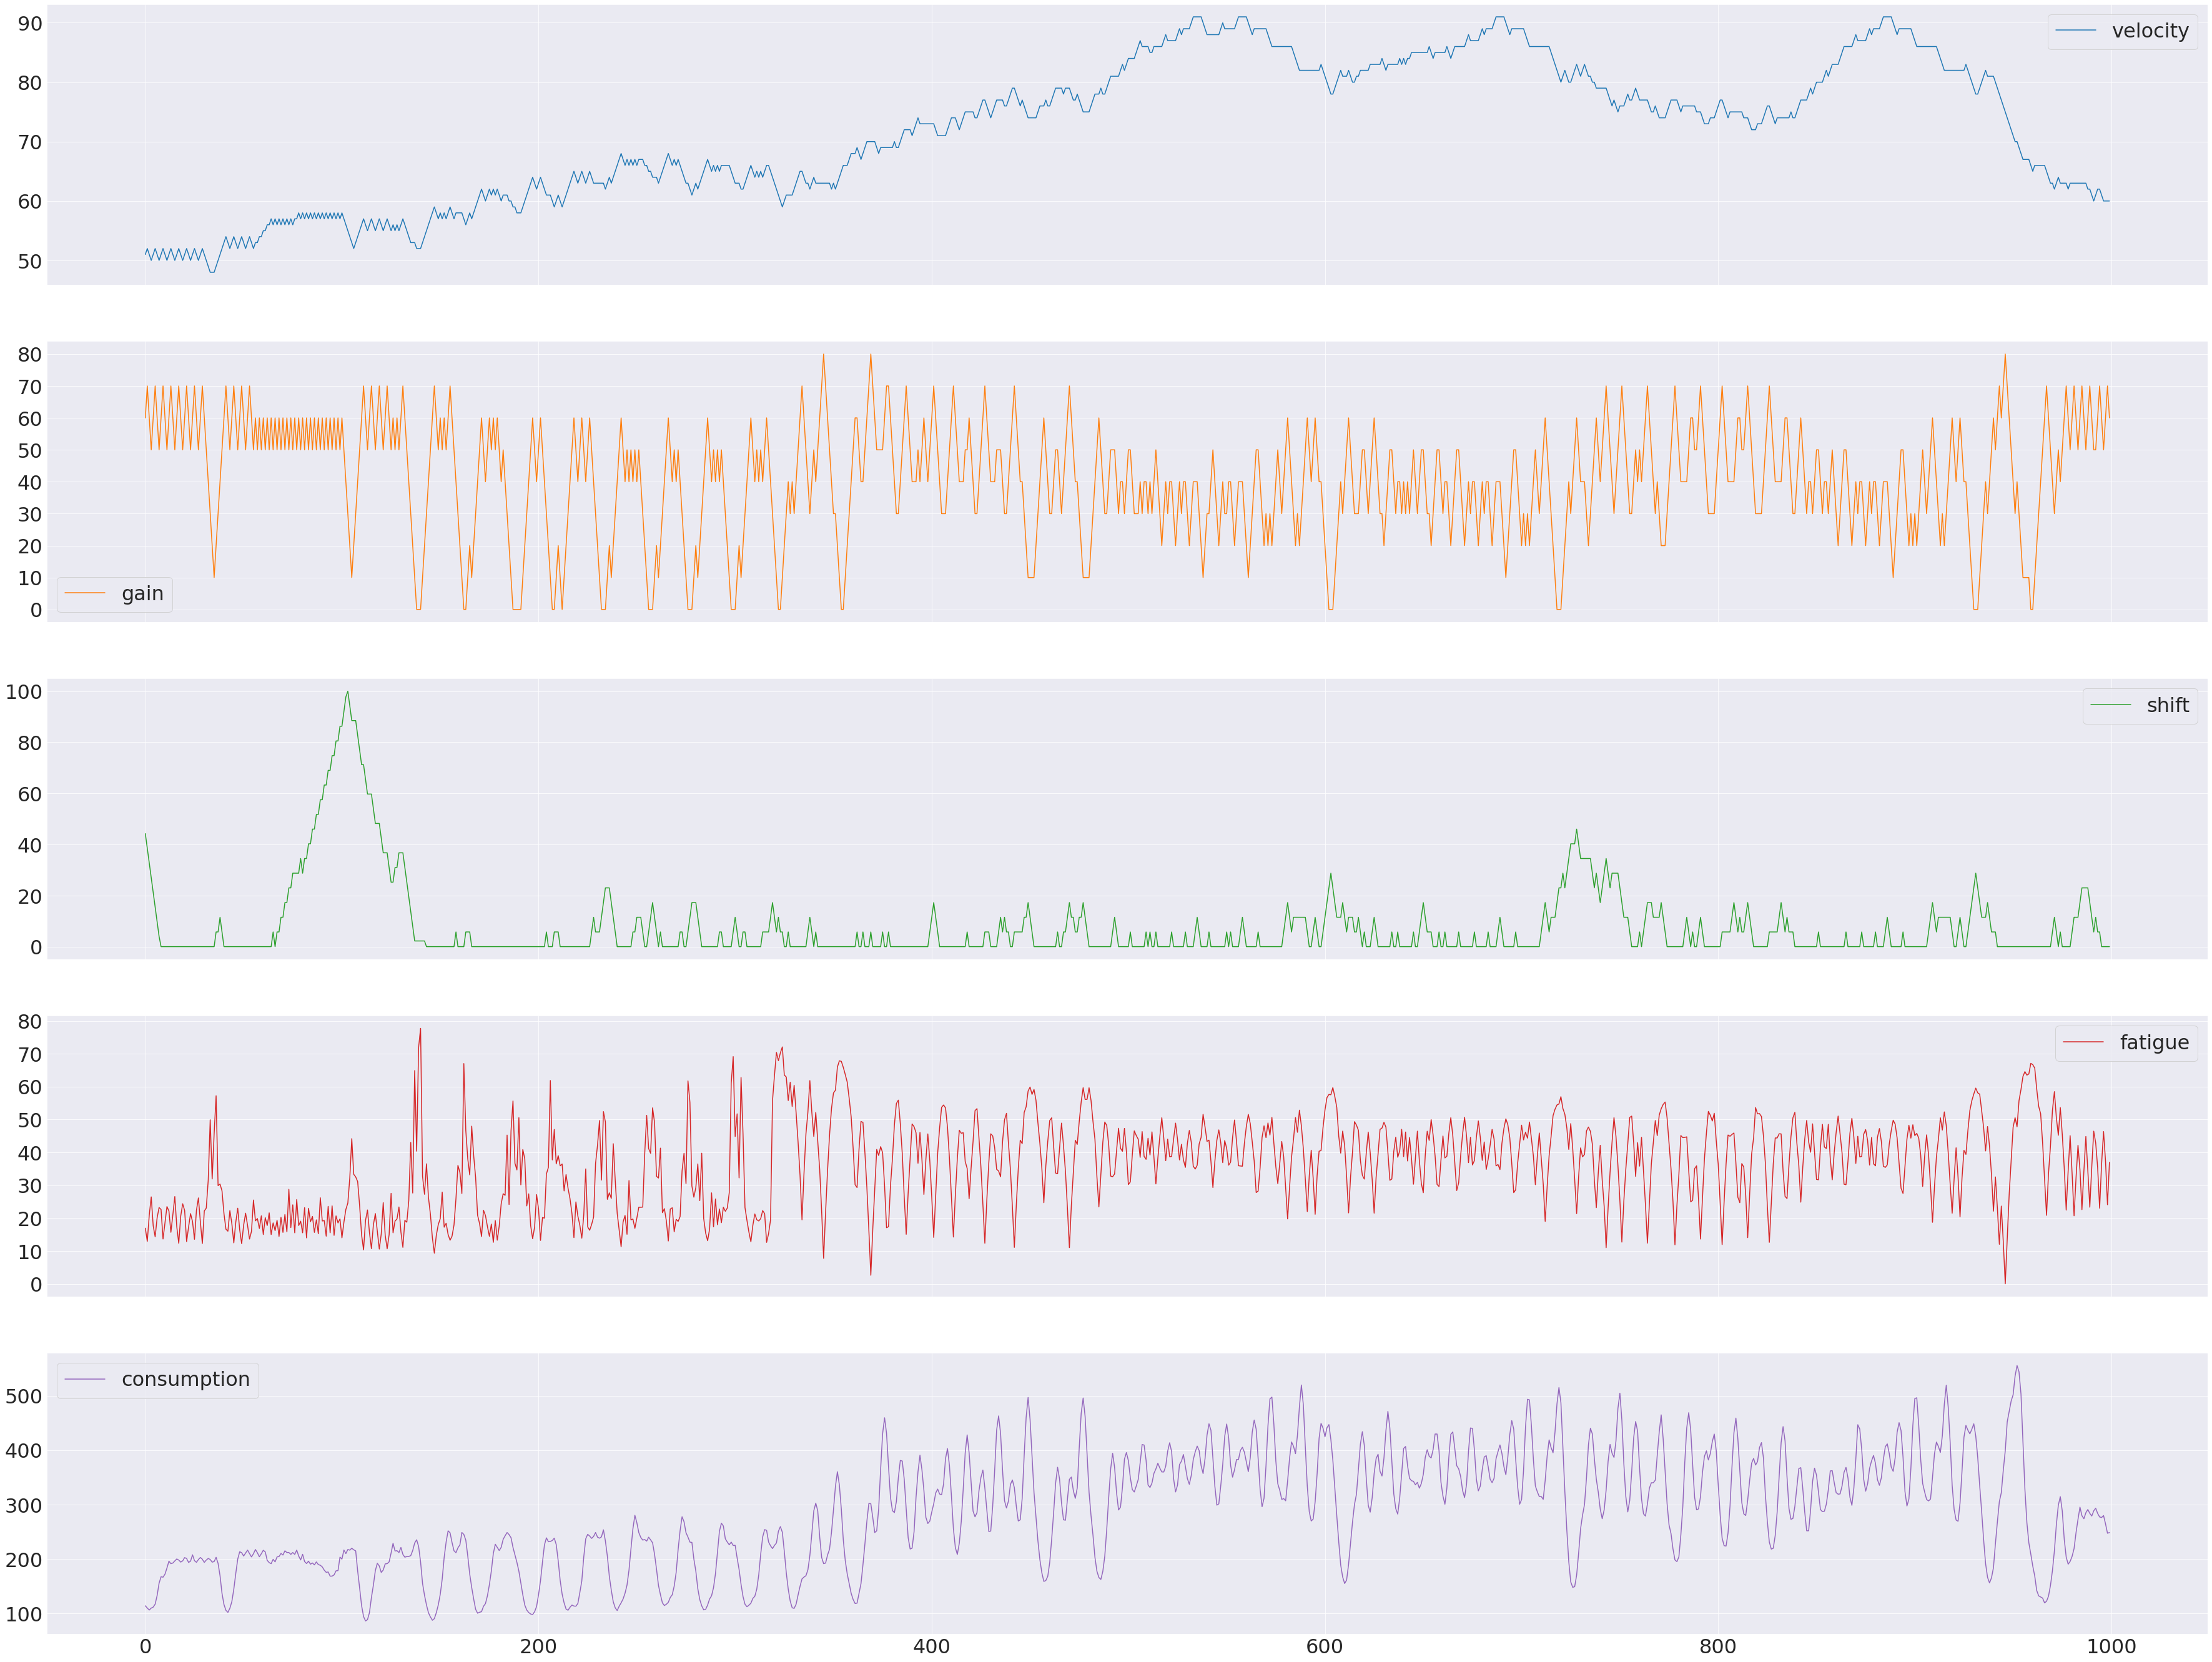

In [9]:
plot_industrial_benchmark_trajectories(policy_benchmarks.evaluators[-1].eval_trajectories[0]['info'])

In [10]:
df = pd.DataFrame(policy_benchmarks.benchmark_metrics)
df.T

,reward,std
policy_trajectory_ep10_model_aeq,-417.936140,158.146695
policy_trajectory_ep10_model_final_h,-532.380553,102.911823
policy_trajectory_ep10_model_h_c,-221.145283,1.888182
policy_trajectory_ep100_model_aeq,-248.912516,80.403375
policy_trajectory_ep100_model_final_h,-290.726140,75.924724
policy_trajectory_ep100_model_h_c,-228.692722,1.132101
policy_trajectory_ep1000_model_aeq,-439.637491,3.278115
policy_trajectory_ep1000_model_h_c,-366.907097,150.935780
policy_trajectory_ep1000_model_final_h,-373.515095,28.183451


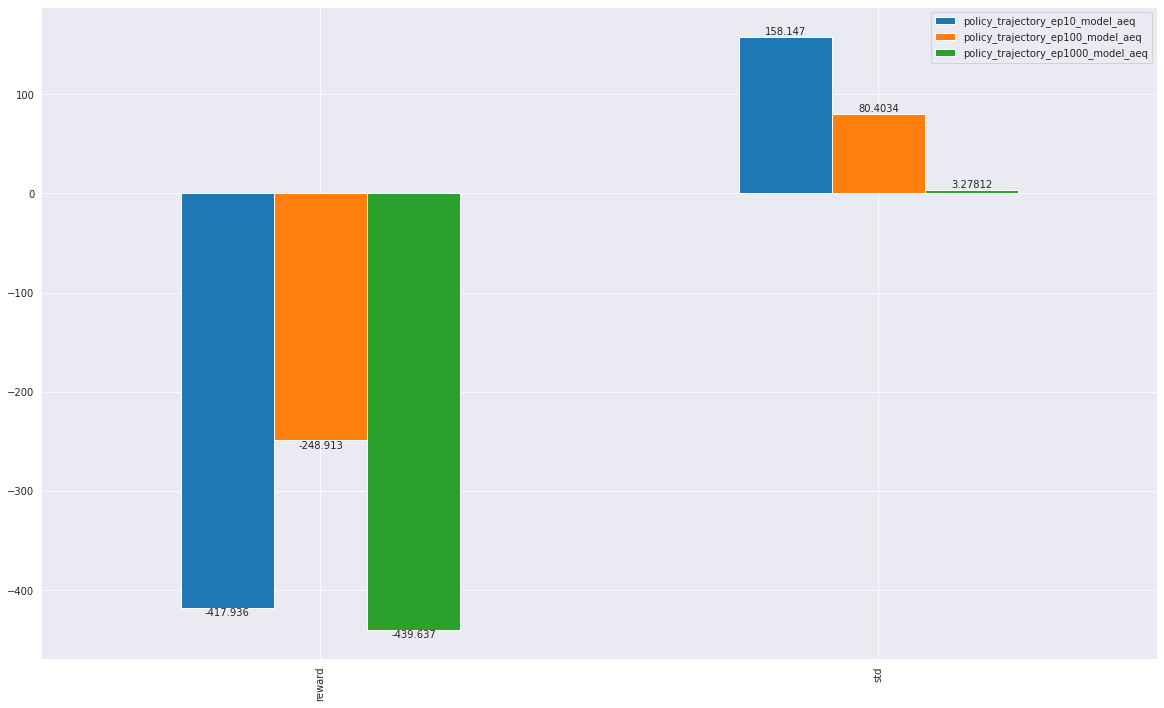

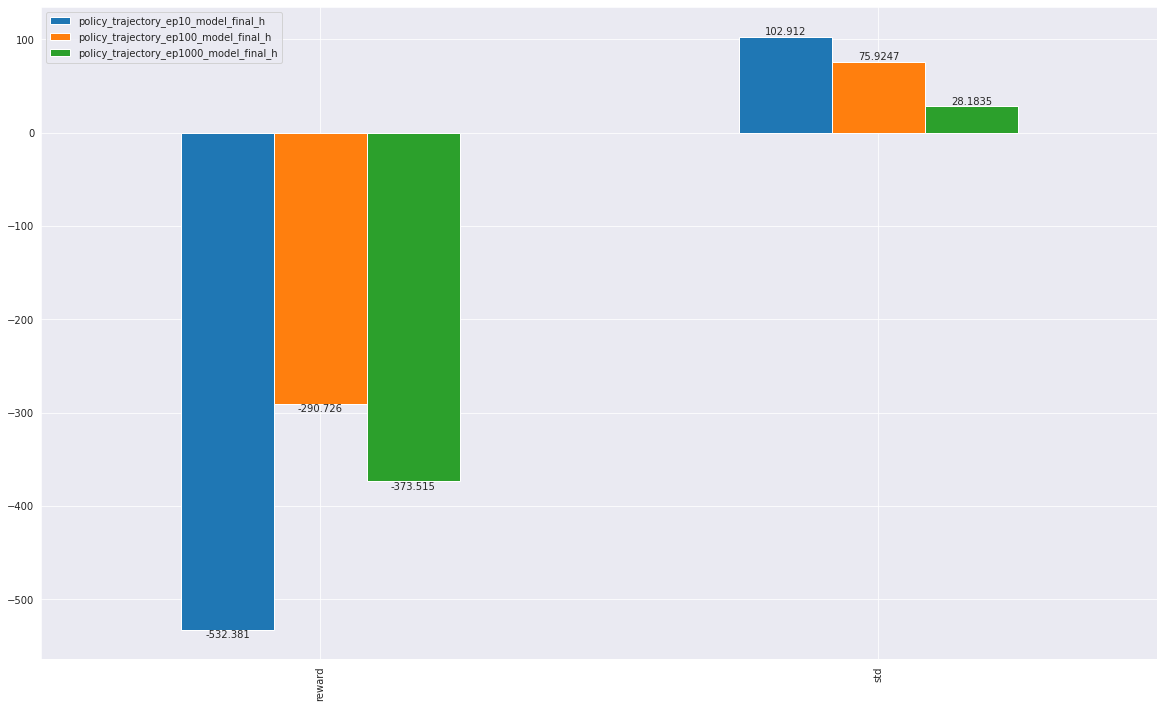

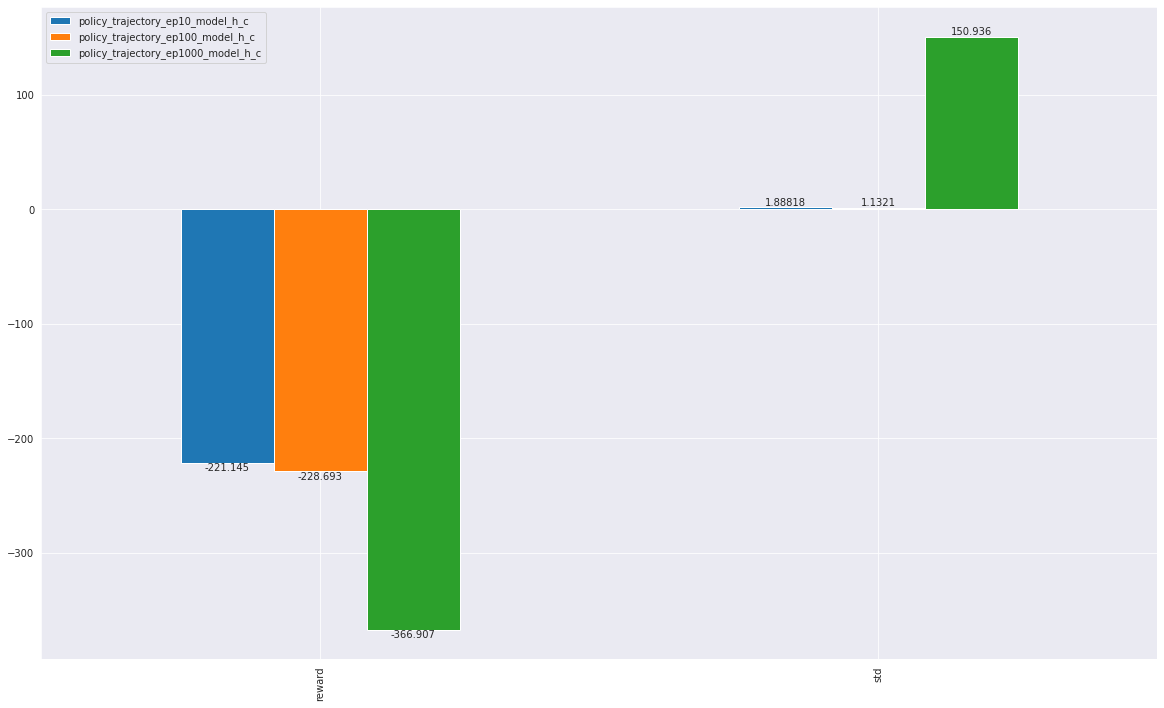

In [11]:

plt.rcParams["figure.figsize"] = [20, 12]

model_names_un = np.unique(model_names)
for model_name in model_names_un:
    m = np.core.defchararray.find(df.columns.values.astype(str), model_name) >= 0
    fdf = df.loc[:, m]
    ax = fdf.plot.bar()

    for container in ax.containers:
        ax.bar_label(container)
    plt.show()